In [1]:
from google.colab import drive
import numpy as np

drive.mount('/content/drive')
with open('/content/drive/My Drive/Colab Notebooks/data/iris.csv', 'r') as f: 
  temp = np.genfromtxt(f,delimiter=',')
  # binary classification, original label 2 -> class 0; loriginal abel 3 -> class 1
  X = temp[50:150,:-1]
  y = temp[50:150,-1]-2

Mounted at /content/drive


In [2]:
# a naive pattern classifier to estimate the poseterior probability g(x)
from sklearn.decomposition import PCA
from scipy.special import expit

pca = PCA(n_components=1)  # a PCA model with 1 principal component
# project 4D feature into 1D subspace (the principal component)
X_r = pca.fit_transform(X)
g = expit(X_r)  # expit(x) = 1/(1+exp(-x)) is the sigmoidal function

In [7]:
# Set a threshold b, find TP, FN, TN, FP
from sklearn.metrics import confusion_matrix

b = 0.4
yhat = g > b
cm = confusion_matrix(y, yhat)
print('TN, FP, FN, TP:',cm.flatten())
print(cm)

TN, FP, FN, TP: [33 17  1 49]
[[33 17]
 [ 1 49]]


In [5]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(y, g)
roc_auc = metrics.roc_auc_score(y,g)
print('Area under curve (AUC) = ',roc_auc)

Area under curve (AUC) =  0.9472


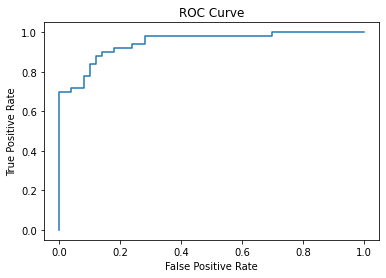

In [6]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr,tpr)

In [ ]:
drive.flush_and_unmount()